In [1]:
from src.deep_learning.yolo_model_manager import YoloModelManager

WARNING  Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at 'C:\Users\Zeroxin\AppData\Roaming\Ultralytics\settings.yaml'


In [7]:
from PIL import Image
img = Image.open("E:\\y_test\\cabc30fc-e7726578.jpg")

In [ ]:
manager = YoloModelManager("yolov8n.pt")

In [3]:
model, detection_output = manager.predict(img)


0: 384x640 1 person, 3 cars, 83.0ms
Speed: 2.5ms preprocess, 83.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


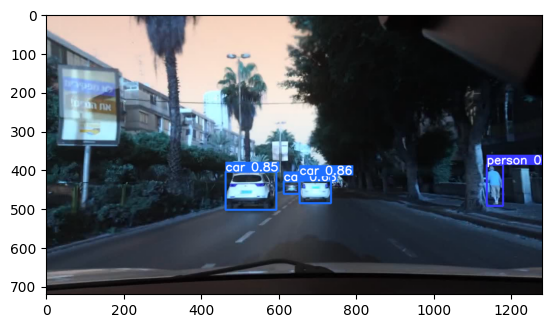

In [10]:
import matplotlib.pyplot as plt

for img in detection_output:
    plt.imshow(img)

In [7]:
result = model.val()

Ultralytics YOLOv8.0.120  Python-3.9.0 torch-2.0.0+cpu CPU
val: Scanning E:\year_proj\00_repos\annual-main-project\src\notebooks\datasets\coco\labels\val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [07:16<00:00,  1.40s/it]
                   all       5000      36335      0.633      0.475      0.521      0.371
                person       5000      10777      0.754      0.673      0.745      0.514
               bicycle       5000        314      0.687      0.392      0.457      0.265
                   car       5000       1918      0.646      0.515      0.561      0.364
            motorcycle       5000        367       0.71       0.58      0.655      0.413
              airplane       5000        143      0.814      0.766      0.832      0.653
                   bus       5000        283      0.746      0.643      0.7

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!
Loading and preparing results...
DONE (t=4.74s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=62.32s).
Accumulating evaluation results...
DONE (t=10.10s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.373
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.525
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.405
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.410
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.535
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.532
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

Results saved to runs\detect\val5


In [10]:
model.export(format="onnx")

Ultralytics YOLOv8.0.120  Python-3.9.0 torch-2.0.0+cpu CPU

PyTorch: starting from yolov8n.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ---------------------------------------- 13.3/13.3 MB 8.4 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success  13.0s, saved as yolov8n.onnx (12.2 MB)

Export complete (13.3s)
Results saved to E:\\year_proj\00_repos\annual-main-project\src\notebooks
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640 
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml 
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'yolov8n.onnx'

In [11]:
model.__dict__

{'callbacks': defaultdict(list,
             {'on_pretrain_routine_start': [<function ultralytics.yolo.utils.callbacks.base.on_pretrain_routine_start(trainer)>,
               <function ultralytics.yolo.utils.callbacks.tensorboard.on_pretrain_routine_start(trainer)>],
              'on_pretrain_routine_end': [<function ultralytics.yolo.utils.callbacks.base.on_pretrain_routine_end(trainer)>,
               <function ultralytics.yolo.utils.callbacks.hub.on_pretrain_routine_end(trainer)>],
              'on_train_start': [<function ultralytics.yolo.utils.callbacks.base.on_train_start(trainer)>,
               <function ultralytics.yolo.utils.callbacks.hub.on_train_start(trainer)>],
              'on_train_epoch_start': [<function ultralytics.yolo.utils.callbacks.base.on_train_epoch_start(trainer)>],
              'on_train_batch_start': [<function ultralytics.yolo.utils.callbacks.base.on_train_batch_start(trainer)>],
              'optimizer_step': [<function ultralytics.yolo.utils.callba

In [2]:
my_manager = YoloModelManager("detection_model.onnx")

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.


In [8]:
model, detection_output = my_manager.predict(img)

Loading detection_model.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement "onnxruntime" not found, attempting AutoUpdate...
     ---------------------------------------- 6.7/6.7 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
     ---------------------------------------- 86.8/86.8 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 95.2/95.2 kB ? eta 0:00:00

requirements: 1 package updated per ('onnx', 'onnxruntime')
requirements:  Restart runtime or rerun command for updates to take effect


0: 640x640 1 person, 3 cars, 53.0ms
Speed: 4.5ms preprocess, 53.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [9]:
for img in detection_output:
    plt.imshow(img)

NameError: name 'plt' is not defined